In this notebook i will compare calibration results from two sphere wideband calibrations. And the results after ebing process with EK80 and Echoview.

In [2]:
import csv
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import array as arr
import datetime as dt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter

%matplotlib inline

# Just copy paste data..

## 200 kHz

In [3]:
EV_200_22_f = [185000,186000,187000,188000,189000,190000,191000,192000,193000,194000,206000,207000,208000,209000,210000,211000,212000,213000,214000,215000,216000,217000,218000,219000,220000,221000,222000,223000,224000,239000,240000,241000,242000,243000,244000,245000,246000,247000,248000,249000,250000,251000,252000,253000,254000,255000]
EV_200_22_g = [25.8971,26.2426,26.3704,26.0357,26.0393,26.3371,26.2771,26.0265,26.1403,26.3191,26.6342,26.7078,26.6875,26.7289,26.837,26.9181,27.0007,27.0702,27.0726,27.1333,27.2699,27.3188,27.2477,27.3311,27.5347,27.53,27.1505,26.9075,27.0922,27.6456,27.6829,27.6419,27.5869,27.53,27.41,27.2943,27.3845,27.5879,27.6733,27.625,27.624,27.6799,27.609,27.4978,27.6086,27.7006]
EV_200_38_f = [185000,186000,187000,188000,189000,190000,191000,192000,193000,194000,195000,196000,197000,198000,199000,200000,201000,202000,203000,204000,231000,232000,233000,234000,235000,236000,237000,238000,239000]
EV_200_38_g = [26.5625,26.5738,26.5995,26.5142,26.4495,26.4573,26.4264,26.3552,26.3548,26.4234,26.4614,26.4619,26.4955,26.5472,26.5366,26.4919,26.5372,26.6099,26.572,26.563,27.7309,27.7626,27.8137,27.7617,27.73,27.7769,27.7264,27.4709,27.4232]

EK_200_22_f = [185000,185980,186961,187942,188923,189904,190885,191866,192847,193828,194809,195790,205600,206581,207562,208543,209524,210505,211486,212467,213448,214429,215410,216391,217372,218353,219334,220315,221296,222277,223258,224239,225220,238953,239934,240915,241896,242877,243858,244839,245820,246801,247782,248763,249744,250725,251706,252687,253668,254649,255000]
EK_200_22_g = [26.21,26.21,26,26.31,26.21,26.42,26.47,26.43,26.61,26.48,26.66,26.54,27.39,27.67,27.61,27.67,27.91,27.9,28.03,28.19,28.34,28.3,28.44,28.7,28.62,28.72,28.94,28.96,29.03,28.73,28.23,28.91,29.11,29.66,29.71,29.72,29.7,29.7,29.56,29.49,29.63,29.88,30.05,30.05,30.06,30.04,30.03,30.13,30,30.09,30.13]
EK_200_38_f = [185000,185980,186961,187942,188923,189904,190885,191866,192847,193828,194809,195790,196771,197752,198733,199714,200695,201676,202657,203638,204619,230125,231106,232087,233068,234049,235030,236011,236991,237972,238953,239934]
EK_200_38_g = [26.67,26.58,26.62,26.71,26.7,26.67,26.63,26.65,26.68,26.74,26.83,26.9,27.02,27.11,27.25,27.33,27.31,27.47,27.46,27.58,27.69,29.81,29.73,29.67,29.79,29.81,29.81,29.77,29.72,29.73,29.64,29.64]

Text(0.5, 0, 'Frequency (Hz)')

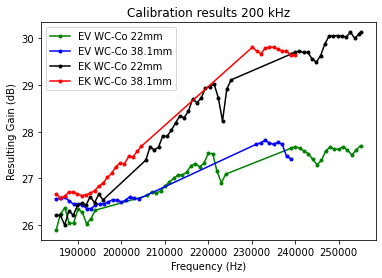

In [38]:
plt.plot(EV_200_22_f,EV_200_22_g, 'g.-', label='EV WC-Co 22mm')
plt.plot(EV_200_38_f,EV_200_38_g, 'b.-', label='EV WC-Co 38.1mm')
plt.plot(EK_200_22_f,EK_200_22_g, 'k.-', label='EK WC-Co 22mm')
plt.plot(EK_200_38_f,EK_200_38_g, 'r.-', label='EK WC-Co 38.1mm')
plt.legend()
plt.title('Calibration results 200 kHz')
plt.ylabel('Resulting Gain (dB)')
plt.xlabel('Frequency (Hz)')

No difference with temperature included. What is up with the discrepancy... I used similar thresholds for single echo detections.

### 120 kHz

In [35]:
EV_120_22_f = [90000,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000,101000,102000,103000,104000,105000,106000,107000,108000,109000,110000,111000,112000,113000,114000,115000,116000,117000,118000,119000,120000,121000,122000,123000,124000,125000,126000,127000,128000,129000,130000,131000,132000,133000,134000,135000,136000,137000,138000,139000,140000,141000,142000,143000,144000,145000,146000,147000,148000,149000,150000]
EV_120_22_g = [23.6037,24.0458,25.0231,26.1107,26.8926,27.4944,27.8998,28.0216,27.9251,27.8165,27.8556,27.9624,27.9743,27.863,27.7353,27.6883,27.6814,27.6539,27.653,27.6604,27.5707,27.4446,27.3728,27.2807,27.1092,26.9986,27.0043,26.9021,26.7715,26.8067,26.8512,26.705,26.5202,26.5646,26.621,26.5698,26.5832,26.7396,26.8222,26.8084,26.8739,27.0414,27.121,27.0894,27.135,27.3429,27.4924,27.4725,27.3717,27.4674,27.6675,27.7152,27.5887,27.5127,27.6828,27.8236,27.7382,27.6158,27.5841,27.5515,27.4857]
EV_120_38_f = [101000,102000,103000,104000,105000,106000,107000,108000,109000,121000,122000,123000,124000,125000,126000,127000,128000,129000,146000,147000,148000,149000,150000,151000,152000,153000,154000,155000,156000,157000,158000,159000,160000,161000]
EV_120_38_g = [28.1006,28.05,27.8862,27.7535,27.7105,27.6982,27.7218,27.8237,27.848,26.6243,26.6058,26.4878,26.5357,26.7436,26.7769,26.6473,26.7749,27.0161,27.8409,27.6225,27.5451,27.625,27.6852,27.7167,27.806,27.786,27.5989,27.4459,27.4081,27.3954,27.3823,27.4258,27.5086,27.5371]

EK_120_22_f = [90000,90480,90960,91441,91921,92402,92882,93363,93843,94324,94804,95285,95765,96246,96726,97207,97687,98168,98648,99129,99609,100090,100570,101051,101531,102012,102492,102972,103453,103933,104414,104894,105375,105855,106336,106816,107297,107777,108258,108738,109219,109699,110180,110660,111141,111621,112102,112582,113063,113543,114024,114504,114984,115465,115945,116426,116906,117387,117867,118348,118828,119309,119789,120270,120750,121231,121711,122192,122672,123153,123633,124114,124594,125075,125555,126036,126516,126996,127477,127957,128438,128918,129399,129879,130360,130840,131321,131801,132282,132762,133243,133723,134204,134684,135165,135645,136126,136606,137087,137567,138048,138528,139009,139489,139969,140450,140930,141411,141891,142372,142852,143333,143813,144294,144774,145255,145735,146216,146696,147177,147657,148138,148618,149099,149579,150060,150540,151021,151501,151981]
EK_120_22_g = [20.77,21.36,21.91,22.36,22.78,23.28,23.83,24.36,24.8,25.21,25.54,25.84,26.05,26.21,26.3,26.34,26.34,26.34,26.33,26.32,26.36,26.44,26.55,26.64,26.7,26.7,26.68,26.66,26.65,26.65,26.64,26.62,26.62,26.67,26.73,26.77,26.78,26.78,26.82,26.87,26.92,26.9,26.87,26.85,26.86,26.9,26.9,26.85,26.78,26.77,26.81,26.86,26.87,26.83,26.78,26.79,26.85,26.92,26.94,26.94,26.92,26.94,26.99,27.07,27.11,27.09,27,26.91,26.89,26.96,27.07,27.15,27.2,27.18,27.14,27.16,27.25,27.39,27.52,27.6,27.6,27.57,27.56,27.61,27.73,27.88,28,28.08,28.09,28.07,28.05,28.08,28.2,28.37,28.53,28.63,28.7,28.71,28.7,28.69,28.71,28.8,28.93,29.07,29.18,29.25,29.28,29.28,29.29,29.29,29.31,29.36,29.45,29.56,29.68,29.74,29.76,29.74,29.71,29.7,29.69,29.67,29.66,29.68,29.71,29.74,29.77,29.82,29.88,29.93]
EK_120_38_f = [100090,100570,101051,101531,102012,102492,102972,103453,103933,104414,104894,105375,105855,106336,106816,107297,107777,108258,108738,109219,109699,118348,118828,119309,119789,120270,120750,121231,121711,122192,122672,123153,123633,124114,124594,125075,125555,126036,126516,126996,127477,127957,128438,128918,129399,129879,143333,143813,144294,144774,145255,145735,146216,146696,147177,147657,148138,148618,149099,149579,150060,150540,151021,151501,151981,152462,152942,153423,153903,154384,154864,155345,155825,156306,156786,157267,157747,158228,158708,159189,159669,160150,160630,161111,161591,162072,162552]
EK_120_38_g = [26.56,26.66,26.75,26.78,26.75,26.69,26.65,26.63,26.63,26.6,26.56,26.55,26.62,26.73,26.82,26.83,26.82,26.89,27.01,27.1,27.07,26.62,26.58,26.68,26.74,26.73,26.66,26.65,26.65,26.63,26.57,26.63,26.82,27.03,27.13,27.07,26.99,27.12,27.33,27.48,27.54,27.59,27.64,27.68,27.67,27.63,29.27,29.45,29.59,29.65,29.64,29.59,29.55,29.51,29.47,29.42,29.38,29.37,29.42,29.47,29.54,29.61,29.69,29.76,29.81,29.82,29.8,29.78,29.78,29.78,29.8,29.78,29.78,29.81,29.83,29.87,29.9,29.94,29.99,30.04,30.09,30.14,30.17,30.2,30.19,30.19,30.18]

Text(0.5, 0, 'Frequency (Hz)')

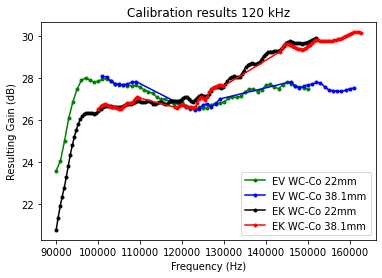

In [37]:
plt.plot(EV_120_22_f,EV_120_22_g, 'g.-', label='EV WC-Co 22mm')
plt.plot(EV_120_38_f,EV_120_38_g, 'b.-', label='EV WC-Co 38.1mm')
plt.plot(EK_120_22_f,EK_120_22_g, 'k.-', label='EK WC-Co 22mm')
plt.plot(EK_120_38_f,EK_120_38_g, 'r.-', label='EK WC-Co 38.1mm')
plt.legend()
plt.title('Calibration results 120 kHz')
plt.ylabel('Resulting Gain (dB)')
plt.xlabel('Frequency (Hz)')